In [2]:
import pandas
import os
import numpy
import seaborn
import matplotlib.pyplot as plt
import json

In [3]:
# jsonları okuyup birleştirme
def read_json_files():
    json_files = os.listdir("merged-data")
    data = []
    for json_file in json_files:
        print(f"Reading {json_file}")
        with open(f"merged-data/{json_file}", "r") as file:
            json_data = json.load(file)
            for tweet in json_data:
                tweet["filename"] = json_file
                data.append(tweet)
    return data


In [4]:

data = read_json_files()
df = pandas.DataFrame(data)
tweets=df.copy()


Reading avukat_merged.json
Reading tarihci_merged.json
Reading ogretmen_merged.json
Reading sporyorumcusu_merged.json
Reading psikolog_merged.json
Reading diyetisyen_merged.json
Reading ziraatmuhendisi_merged.json
Reading doktor_merged.json
Reading ekonomist_merged.json
Reading yazilimci_merged.json


In [5]:
# occupation sütununu oluşturma
tweets['occupation'] = tweets['filename'].str.split('_').str[0]

tweets['occupation'] = tweets['occupation'].replace('ogretmen', 'öğretmen')
tweets['occupation'] = tweets['occupation'].replace('sporyorumcusu', 'spor yorumcusu')
tweets['occupation'] = tweets['occupation'].replace('tarihci', 'tarihçi')
tweets['occupation'] = tweets['occupation'].replace('yazilimci', 'yazılımcı')
tweets['occupation'] = tweets['occupation'].replace('ziraatmuhendisi', 'ziraat mühendisi')

# filename sütununu silme
tweets = tweets.drop('filename', axis=1)


In [47]:
#df ilk verilere bakış
tweets.tail()

# ilk 10 veriyi tablo haline getir ve .png olarak kaydet



,tweet,source,occupation,tweet_length
53841,Dün Hatay Musa Dağı’nda müthiş bir akşamüstü v...,api,yazılımcı,202
53842,Millet ben lifestyle ve vlog’a kayıyorum artık...,api,yazılımcı,186
53843,Adalet yok ya\nCanımı yakar bu sessizlik\n\nYe...,api,yazılımcı,111
53844,✅Dönerin son lokması ile ayranın son yudumu de...,api,yazılımcı,148
53845,"Çok bişey istemiyorum ya, ayağımızı sudan kess...",api,yazılımcı,79


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53846 entries, 0 to 53845
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       53835 non-null  object
 1   source      53846 non-null  object
 2   occupation  53846 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [8]:
tweets.isnull().sum()

tweet         11
source         0
occupation     0
dtype: int64

In [36]:
# null olan verileri silme
tweets = tweets.dropna()


/var/folders/5m/yt3qzmy97flb4x55_1dzdlpc0000gn/T/ipykernel_3578/1668949460.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(x=occupation_freq.index, y=occupation_freq, palette='viridis')


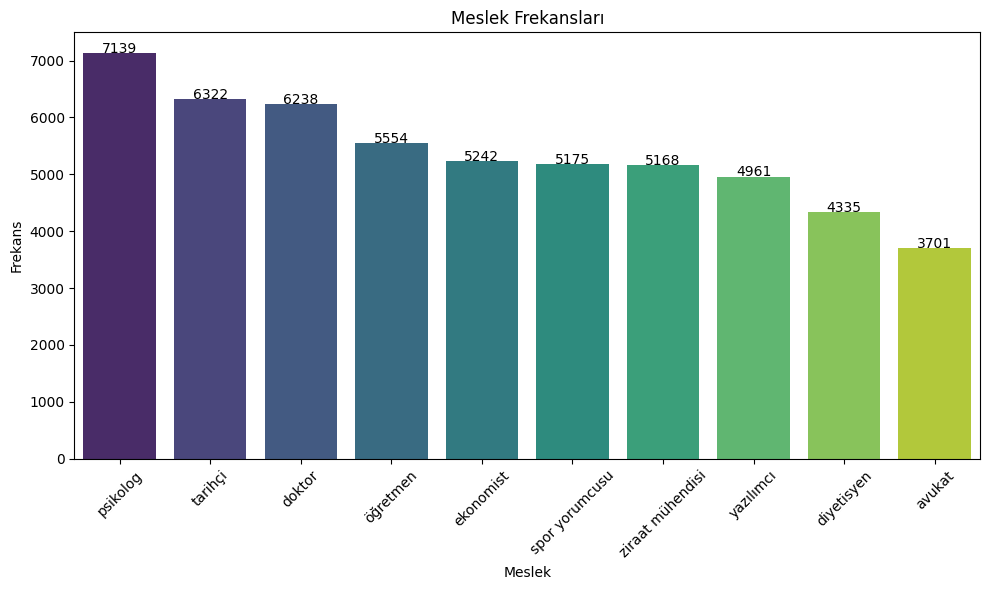

In [37]:
#mesleklerin sayısını bulma
import seaborn as sns
occupation_freq=tweets['occupation'].value_counts()
occupation_freq

# save the occupation frequency plot as a png file 
# write the value of the occupation freq on the bars, with a little padding
# change the collor palette considering values
plt.figure(figsize=(10,6))
sns_plot = sns.barplot(x=occupation_freq.index, y=occupation_freq, palette='viridis')
for index, value in enumerate(occupation_freq):
    sns_plot.text(index,value+0.5,value, color='black', ha="center")
plt.xticks(rotation=45)
plt.title('Meslek Frekansları')
plt.xlabel('Meslek')
plt.ylabel('Frekans')
plt.tight_layout()
plt.savefig('occupation_freq.png')
plt.show()




In [38]:
#verinin geldiği kaynağa göre tweet sayısı
source_freq=tweets['source'].value_counts()
source_freq


source
mayda    43024
api      10811
Name: count, dtype: int64

In [40]:
# mesleğe göre source sayıları
occupation_source_freq=tweets.groupby(['occupation','source']).count()
occupation_source_freq




tweet
occupation       source       
avukat           api       892
                 mayda    2809
diyetisyen       api       809
                 mayda    3526
doktor           api      1328
                 mayda    4910
ekonomist        api      1375
                 mayda    3867
psikolog         api      1304
                 mayda    5835
spor yorumcusu   api       995
                 mayda    4180
tarihçi          api      1444
                 mayda    4878
yazılımcı        api       987
                 mayda    3974
ziraat mühendisi api       473
                 mayda    4695
öğretmen         api      1204
                 mayda    4350

In [41]:
#tweet uzunlukları
tweets['tweet_length']=tweets['tweet'].apply(len)

#mesleklerin ortalama tweet uzunlukları
occupation_tweet_length=tweets.groupby('occupation')['tweet_length'].mean().sort_values(ascending=False)
occupation_tweet_length

/var/folders/5m/yt3qzmy97flb4x55_1dzdlpc0000gn/T/ipykernel_3578/2753121167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_length']=tweets['tweet'].apply(len)


occupation
doktor              180.938442
psikolog            174.361815
avukat              172.710889
tarihçi             164.141095
diyetisyen          150.906344
ekonomist           144.106639
spor yorumcusu      138.107633
ziraat mühendisi    132.204915
öğretmen            123.287000
yazılımcı           114.111671
Name: tweet_length, dtype: float64

In [42]:
#tweet uzunlukları
tweets['tweet_length']=tweets['tweet'].apply(len)

#mesleklerin ortalama tweet uzunlukları
occupation_tweet_length=tweets.groupby('source')['tweet_length'].mean().sort_values(ascending=False)
occupation_tweet_length

/var/folders/5m/yt3qzmy97flb4x55_1dzdlpc0000gn/T/ipykernel_3578/162909321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_length']=tweets['tweet'].apply(len)


source
api      182.653686
mayda    142.573192
Name: tweet_length, dtype: float64

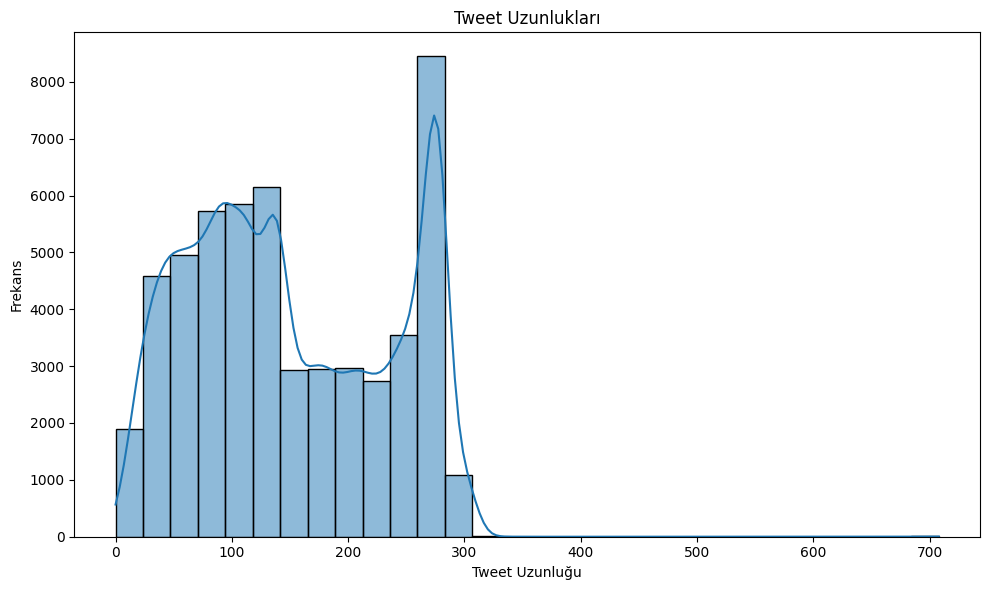

In [44]:

tweets['tweet_length'].describe()
# make the plot of the tweet lengths. compare it with source
plt.figure(figsize=(10,6))
sns.histplot(tweets['tweet_length'], bins=30, kde=True)
plt.title('Tweet Uzunlukları')
plt.xlabel('Tweet Uzunluğu')
plt.ylabel('Frekans')
plt.tight_layout()
plt.savefig('tweet_length.png')
plt.show()





In [35]:
tweets.head()

,tweet,source,occupation,tweet_length
0,Öyle kolay değildir #TürkiyedeAvukatOlmak Yarı...,mayda,avukat,84
1,“Suçsuzluğu ispatlanana kadar herkes suçludur ...,mayda,avukat,149
2,"Hep karanlık, yeter artık ... Saygı ile anıyor...",mayda,avukat,58
3,Suçu saz çalmakmış öğrendiğim kadar... #HelinB...,mayda,avukat,50
4,Marlon Brando'nun doğum günü. BABA-1972,mayda,avukat,39
